In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-345-g8003649c Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.3.1+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY_HERE")
project = rf.workspace("myworkspace-r3ka3").project("flowers_detection-fh5pt")
version = project.version(1)
dataset = version.download("yolov5")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to flowers_detection-1 in yolov5pytorch:: 100%|██████████| 788/788 [00:00<00:00, 5693.51it/s]


In [ ]:
!python train.py --img 640 --batch 16 --epochs 50 --data /content/yolov5/flowers_detection-1/data.yaml

2024-07-18 19:51:10.855045: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 19:51:10.855102: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 19:51:10.856455: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/flowers_detection-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source /content/yolov5/flowers_detection-1/test/images/dandelion.jpg

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/yolov5/flowers_detection-1/test/images/dandelion.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-345-g8003649c Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/flowers_detection-1/test/images/dandelion.jpg: 416x640 1 dandelion, 72.8ms
Speed: 0.6ms pre-process, 72.8ms inference, 1030.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp8


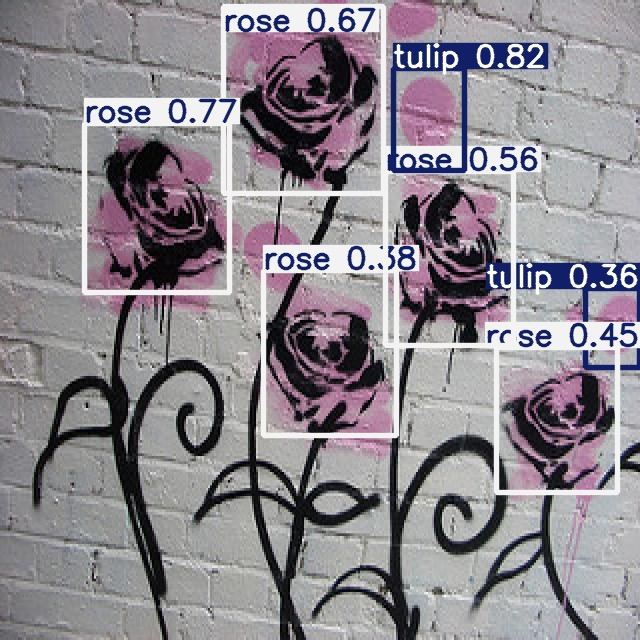

In [ ]:
display.Image(filename='/content/yolov5/runs/detect/exp4/2347579838_dd6d2aaefc_n_jpg.rf.5fccf34bf1bc93101a0c766581280b5c.jpg', width=600)

In [ ]:
%cp -av '/content/yolov5/runs' '/content/drive/MyDrive'

'/content/yolov5/runs' -> '/content/drive/MyDrive/runs'
'/content/yolov5/runs/train' -> '/content/drive/MyDrive/runs/train'
'/content/yolov5/runs/train/exp' -> '/content/drive/MyDrive/runs/train/exp'
'/content/yolov5/runs/train/exp/weights' -> '/content/drive/MyDrive/runs/train/exp/weights'
'/content/yolov5/runs/train/exp/weights/last.pt' -> '/content/drive/MyDrive/runs/train/exp/weights/last.pt'
'/content/yolov5/runs/train/exp/weights/best.pt' -> '/content/drive/MyDrive/runs/train/exp/weights/best.pt'
'/content/yolov5/runs/train/exp/hyp.yaml' -> '/content/drive/MyDrive/runs/train/exp/hyp.yaml'
'/content/yolov5/runs/train/exp/opt.yaml' -> '/content/drive/MyDrive/runs/train/exp/opt.yaml'
'/content/yolov5/runs/train/exp/events.out.tfevents.1721331697.d8cd535c9bbf.1754.0' -> '/content/drive/MyDrive/runs/train/exp/events.out.tfevents.1721331697.d8cd535c9bbf.1754.0'
'/content/yolov5/runs/train/exp/labels_correlogram.jpg' -> '/content/drive/MyDrive/runs/train/exp/labels_correlogram.jpg'
'/co